# 상관분석 & EDA

> 인구데이터 결합 (분석프로세스 참고)

> 하수처리장 결합

> 가축분뇨수진운반업 결합
---
> EDA
- 농가수 대비 두수
- 농가수 대비 처리시설 개수
- 읍면동별_농가수 는 EDA용
- 면적대비 파생변수를 만들어 모델링용 변수 생성

> 상관분석
---
> 모델링

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'basic.xlsx',
 'Basic_dataset.xlsx',
 'Data',
 'df.xlsx',
 'EDA.ipynb',
 'ipynb',
 'merge2020.ipynb',
 'Untitled.ipynb',
 '독립변수_v2.ipynb',
 '독립변수_v2.xlsx',
 '독립변수_v3.xlsx',
 '파생변수_읍면동_농가비율.xlsx',
 '폭염_읍면동통합.xlsx',
 '폭염_읍면동통합_groupby.xlsx',
 '환경부_전처리.ipynb']

In [5]:
df = pd.read_excel('basic.xlsx')
df

,시도,시군,읍면동,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),...,두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
0,서울특별시,종로구,청운효자동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0
1,서울특별시,종로구,종로1.2.3.4가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0
2,서울특별시,종로구,종로5.6가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0
3,서울특별시,종로구,창신제1동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0
4,서울특별시,종로구,창신제2동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,제주특별자치도,서귀포시,송산동,4078.447,164.403114,158.053846,15.173917,0.0,7.0,5.56736,...,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0
4119,제주특별자치도,서귀포시,동홍동,4078.447,164.403114,158.053846,15.173917,NaN,2.0,0.53280,...,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0
4120,제주특별자치도,서귀포시,천지동,NaN,164.403114,158.053846,15.173917,0.0,6.0,6.31259,...,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0
4121,제주특별자치도,서귀포시,서홍동,NaN,164.403114,158.053846,15.173917,NaN,6.0,6.31259,...,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0


# 1. 종속변수 선정- 상관분석

## 1-1. 시군 기준으로 groupby

In [55]:
df_cor = df[['수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도', '시도', '시군', '읍면동',
       '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수']].groupby(by=['시도']).sum().corr()

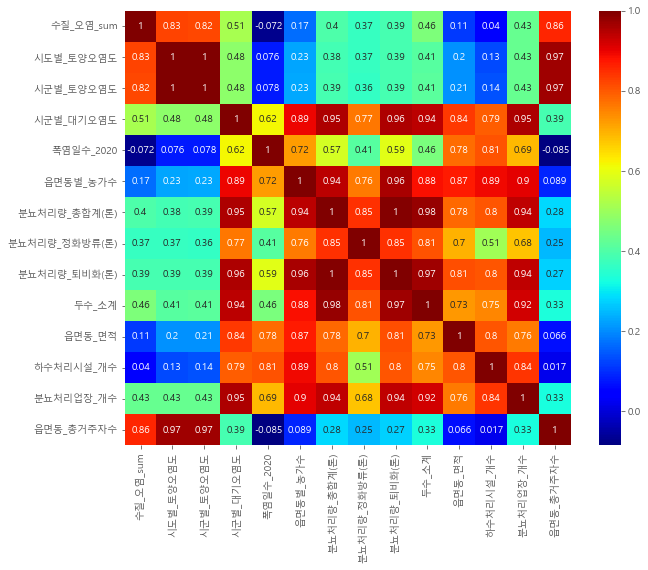

In [56]:
plt.figure(figsize=[10,8])

sns.heatmap(df_cor, annot=True, cmap=plt.cm.jet)
plt.show()

In [57]:
abs(df_cor.iloc[:4,4:]).sum(axis=1)

수질_오염_sum    3.285493
시도별_토양오염도    3.587231
시군별_토양오염도    3.604340
시군별_대기오염도    8.099417
dtype: float64

In [58]:
df_cor.iloc[:4,4:]

,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
수질_오염_sum,-0.071960,0.165773,0.397630,0.365520,0.386696,0.457648,0.113598,0.040129,0.428211,0.858328
시도별_토양오염도,0.076268,0.228633,0.384039,0.367179,0.387124,0.410560,0.204796,0.130287,0.428336,0.970011
시군별_토양오염도,0.078373,0.232507,0.385807,0.363965,0.388783,0.411650,0.205750,0.137970,0.431506,0.968028
시군별_대기오염도,0.615339,0.894591,0.953729,0.766268,0.956011,0.941598,0.835090,0.794621,0.953522,0.388647


In [59]:
df[['수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도']].isna().sum()

수질_오염_sum    3355
시도별_토양오염도      74
시군별_토양오염도      74
시군별_대기오염도    1966
dtype: int64

In [25]:
len(df)

4123

In [26]:
import missingno as msno

<AxesSubplot:>

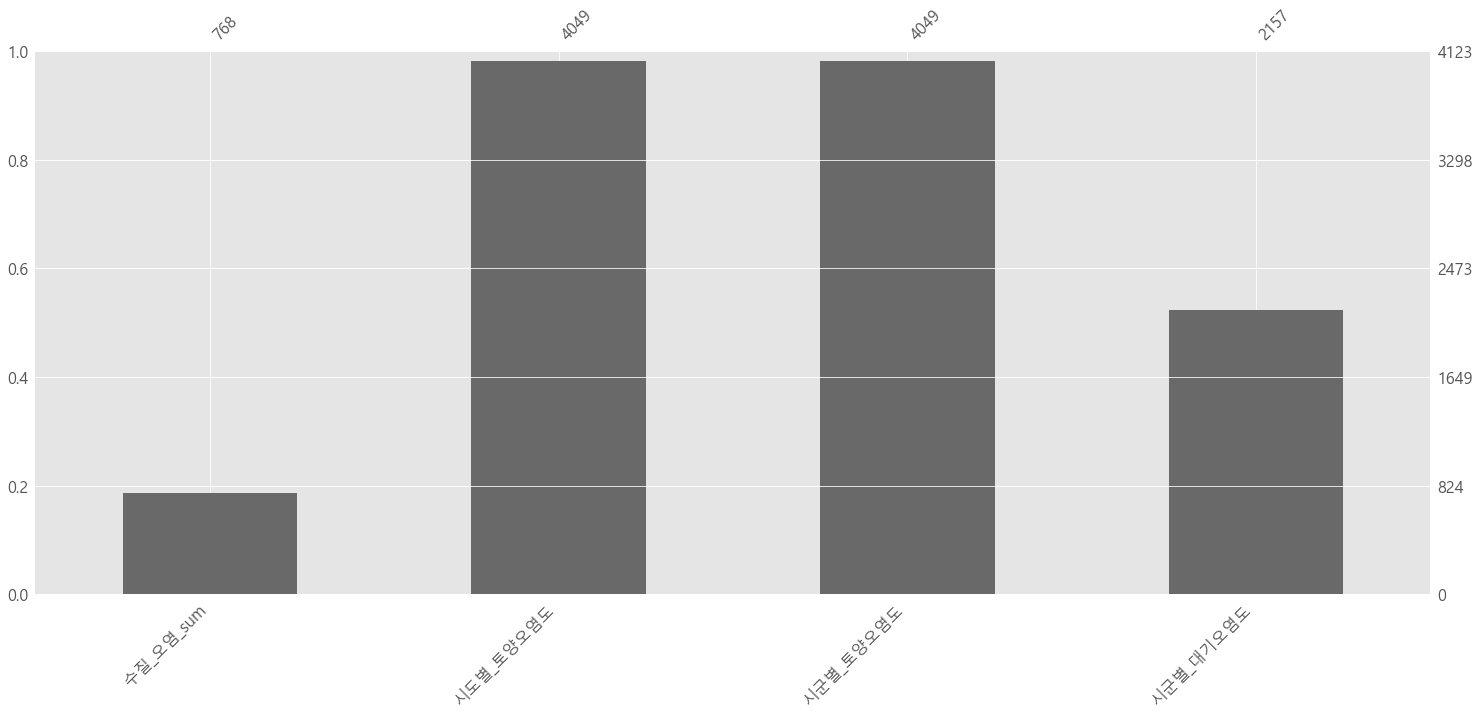

In [27]:
msno.bar(df[['수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도']])

In [61]:
df['시군별_대기오염도'].isna().sum()

1966

In [66]:
df.columns

Index(['시도', '시군', '읍면동', '수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도',
       '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수'],
      dtype='object')

## 2-1. 시도별 대기오염도 merge

In [114]:
대기오염 = pd.read_excel('./Data/독립변수_v3/대기오염도.xlsx')
대기오염

,시도,시군,이산화질소_2020_MEAN,미세먼지_2020_MEAN,아황산가스_2020_MEAN
0,서울특별시,서울특별시,0.023833,20.750000,0.003083
1,부산광역시,부산광역시,0.016167,16.916667,0.003500
2,대구광역시,대구광역시,0.016917,20.000000,0.002333
3,인천광역시,인천광역시,0.020333,18.083333,0.003750
4,광주광역시,광주광역시,0.014000,18.000000,0.002750
...,...,...,...,...,...
157,경상남도,의령군,0.008583,15.083333,0.002667
158,경상남도,창녕군,0.013417,18.666667,0.003333
159,경상남도,합천군,0.008583,14.416667,0.002667
160,제주특별자치도,제주특별자치도,0.011417,15.666667,0.001833


In [115]:
대기오염 = 대기오염.groupby(by='시도').mean()
대기오염

,이산화질소_2020_MEAN,미세먼지_2020_MEAN,아황산가스_2020_MEAN
시도,,,
강원도,0.009417,16.829966,0.002468
경기도,0.019231,20.919355,0.003097
경상남도,0.012236,15.810185,0.003000
경상북도,0.009832,16.634387,0.003378
광주광역시,0.014000,18.000000,0.002750
대구광역시,0.016917,20.000000,0.002333
대전광역시,0.017333,17.416667,0.002250
부산광역시,0.016167,16.916667,0.003500
서울특별시,0.023833,20.750000,0.003083


In [116]:
대기오염['대기오염도_sum'] = 대기오염.sum(axis=1)
대기오염.head()

,이산화질소_2020_MEAN,미세먼지_2020_MEAN,아황산가스_2020_MEAN,대기오염도_sum
시도,,,,
강원도,0.009417,16.829966,0.002468,16.841851
경기도,0.019231,20.919355,0.003097,20.941683
경상남도,0.012236,15.810185,0.003000,15.825421
경상북도,0.009832,16.634387,0.003378,16.647597
광주광역시,0.014000,18.000000,0.002750,18.016750


In [117]:
df['시도'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [118]:
대기오염.reset_index(inplace=True)

In [120]:
대기오염 = 대기오염[['시도','대기오염도_sum']]

In [121]:
df.columns

Index(['시도', '시군', '읍면동', '수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도',
       '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수'],
      dtype='object')

In [122]:
df = pd.merge(df, 대기오염, on='시도', how='left')
df.head()

,시도,시군,읍면동,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),...,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,대기오염도_sum
0,서울특별시,종로구,청운효자동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0,20.776917
1,서울특별시,종로구,종로1.2.3.4가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0,20.776917
2,서울특별시,종로구,종로5.6가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0,20.776917
3,서울특별시,종로구,창신제1동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0,20.776917
4,서울특별시,종로구,창신제2동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0,20.776917


## 2-2. 시도별 토양오염도 merge

In [126]:
토양오염 = pd.read_excel('./Data/독립변수_v3/토양오염도.xlsx')
토양오염

,시도,Cu,Zn,Ni
0,서울특별시,229.0,363.0,19.0
1,서울특별시,43.2,557.5,19.3
2,서울특별시,30.0,105.8,7.3
3,서울특별시,6.0,51.9,17.9
4,서울특별시,17.4,60.6,7.3
...,...,...,...,...
3485,제주특별자치도,42.8,137.9,21.2
3486,제주특별자치도,41.3,145.8,64.4
3487,제주특별자치도,37.2,128.5,50.6
3488,제주특별자치도,34.0,60.1,68.0


In [127]:
토양오염 = 토양오염.groupby(by='시도').mean().reset_index()
토양오염

,시도,Cu,Zn,Ni
0,강원도,78.711556,118.240444,16.862222
1,경기도,93.033544,220.145019,25.542119
2,경상남도,27.281407,120.824623,15.221608
3,경상북도,22.966912,130.335662,13.534926
4,광주광역시,11.256000,105.577000,7.226000
5,대구광역시,15.619828,63.722414,9.306034
6,대전광역시,29.540367,125.471560,9.286239
7,부산광역시,30.167647,159.444118,10.414118
8,서울특별시,58.285583,130.938650,21.121472
9,세종특별자치시도,23.966667,100.133333,19.253333


In [128]:
토양오염['토양오염도_sum'] = 토양오염[['Cu','Zn','Ni']].sum(axis=1)
토양오염

,시도,Cu,Zn,Ni,토양오염도_sum
0,강원도,78.711556,118.240444,16.862222,213.814222
1,경기도,93.033544,220.145019,25.542119,338.720681
2,경상남도,27.281407,120.824623,15.221608,163.327638
3,경상북도,22.966912,130.335662,13.534926,166.837500
4,광주광역시,11.256000,105.577000,7.226000,124.059000
5,대구광역시,15.619828,63.722414,9.306034,88.648276
6,대전광역시,29.540367,125.471560,9.286239,164.298165
7,부산광역시,30.167647,159.444118,10.414118,200.025882
8,서울특별시,58.285583,130.938650,21.121472,210.345706
9,세종특별자치시도,23.966667,100.133333,19.253333,143.353333


In [130]:
토양오염 = 토양오염[['시도','토양오염도_sum']]
토양오염

,시도,토양오염도_sum
0,강원도,213.814222
1,경기도,338.720681
2,경상남도,163.327638
3,경상북도,166.837500
4,광주광역시,124.059000
5,대구광역시,88.648276
6,대전광역시,164.298165
7,부산광역시,200.025882
8,서울특별시,210.345706
9,세종특별자치시도,143.353333


In [131]:
df = pd.merge(df, 토양오염, on='시도', how='left')
df

,시도,시군,읍면동,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),...,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,대기오염도_sum,토양오염도_sum
0,서울특별시,종로구,청운효자동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0,20.776917,210.345706
1,서울특별시,종로구,종로1.2.3.4가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0,20.776917,210.345706
2,서울특별시,종로구,종로5.6가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0,20.776917,210.345706
3,서울특별시,종로구,창신제1동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0,20.776917,210.345706
4,서울특별시,종로구,창신제2동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0,20.776917,210.345706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,제주특별자치도,서귀포시,송산동,4078.447,164.403114,158.053846,15.173917,0.0,7.0,5.56736,...,0.0,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0,15.426917,266.430000
4119,제주특별자치도,서귀포시,동홍동,4078.447,164.403114,158.053846,15.173917,NaN,2.0,0.53280,...,0.0,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0,15.426917,266.430000
4120,제주특별자치도,서귀포시,천지동,NaN,164.403114,158.053846,15.173917,0.0,6.0,6.31259,...,0.0,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0,15.426917,266.430000
4121,제주특별자치도,서귀포시,서홍동,NaN,164.403114,158.053846,15.173917,NaN,6.0,6.31259,...,0.0,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0,15.426917,266.430000


## 2-3. 시도별 수질오염도 merge

In [132]:
df.columns

Index(['시도', '시군', '읍면동', '수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도',
       '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수', '대기오염도_sum',
       '토양오염도_sum'],
      dtype='object')

In [134]:
수질오염도 = pd.read_excel('./Data/독립변수_v3/수질오염도.xlsx')
수질오염도

,시도,총대장균군 (군수/100mL),질산성질소NO3-N (mg/L),염소이온Cl- (mg/L)
0,서울특별시,0,4.5,65.6
1,부산광역시,4,3.9,75.3
2,대구광역시,442,2.1,47.9
3,인천광역시,28,6.1,163.4
4,광주광역시,30,3.8,36.8
5,대전광역시,224,3.8,32.1
6,울산광역시,246,2.0,33.9
7,세종특별자치시,2,3.3,26.1
8,경기도,106,4.3,74.7
9,강원도,218,3.5,61.8


In [138]:
수질오염도.columns

Index(['시도', '총대장균군 (군수/100mL)', '질산성질소NO3-N (mg/L)', '염소이온Cl- (mg/L)'], dtype='object')

In [140]:
수질오염도['수질오염도_sum'] = 수질오염도[['총대장균군 (군수/100mL)', '질산성질소NO3-N (mg/L)', '염소이온Cl- (mg/L)']].sum(axis=1)
수질오염도

,시도,총대장균군 (군수/100mL),질산성질소NO3-N (mg/L),염소이온Cl- (mg/L),수질오염도_sum
0,서울특별시,0,4.5,65.6,70.1
1,부산광역시,4,3.9,75.3,83.2
2,대구광역시,442,2.1,47.9,492.0
3,인천광역시,28,6.1,163.4,197.5
4,광주광역시,30,3.8,36.8,70.6
5,대전광역시,224,3.8,32.1,259.9
6,울산광역시,246,2.0,33.9,281.9
7,세종특별자치시,2,3.3,26.1,31.4
8,경기도,106,4.3,74.7,185.0
9,강원도,218,3.5,61.8,283.3


In [147]:
수질오염도 = 수질오염도[['시도','수질오염도_sum']]
수질오염도.head()

,시도,수질오염도_sum
0,서울특별시,70.1
1,부산광역시,83.2
2,대구광역시,492.0
3,인천광역시,197.5
4,광주광역시,70.6


In [149]:
df = pd.merge(df, 수질오염도, on='시도', how='left')
df

,시도,시군,읍면동,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),...,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,대기오염도_sum,토양오염도_sum,수질오염도_sum
0,서울특별시,종로구,청운효자동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0,20.776917,210.345706,70.1
1,서울특별시,종로구,종로1.2.3.4가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0,20.776917,210.345706,70.1
2,서울특별시,종로구,종로5.6가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0,20.776917,210.345706,70.1
3,서울특별시,종로구,창신제1동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0,20.776917,210.345706,70.1
4,서울특별시,종로구,창신제2동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0,20.776917,210.345706,70.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,제주특별자치도,서귀포시,송산동,4078.447,164.403114,158.053846,15.173917,0.0,7.0,5.56736,...,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0,15.426917,266.430000,40.6
4119,제주특별자치도,서귀포시,동홍동,4078.447,164.403114,158.053846,15.173917,NaN,2.0,0.53280,...,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0,15.426917,266.430000,40.6
4120,제주특별자치도,서귀포시,천지동,NaN,164.403114,158.053846,15.173917,0.0,6.0,6.31259,...,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0,15.426917,266.430000,40.6
4121,제주특별자치도,서귀포시,서홍동,NaN,164.403114,158.053846,15.173917,NaN,6.0,6.31259,...,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0,15.426917,266.430000,40.6


In [150]:
df.columns

Index(['시도', '시군', '읍면동', '수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도',
       '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수', '대기오염도_sum',
       '토양오염도_sum', '수질오염도_sum'],
      dtype='object')

In [153]:
df = df[['대기오염도_sum','토양오염도_sum', '수질오염도_sum','수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도',
   '시도', '시군', '읍면동','폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수']].rename(columns={'수질_오염_sum':'시군별_수질오염도'})
df

,대기오염도_sum,토양오염도_sum,수질오염도_sum,시군별_수질오염도,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,...,두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
0,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,...,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0
1,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,...,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0
2,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,...,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0
3,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,...,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0
4,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,...,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,15.426917,266.430000,40.6,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,...,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0
4119,15.426917,266.430000,40.6,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,...,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0
4120,15.426917,266.430000,40.6,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,...,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0
4121,15.426917,266.430000,40.6,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,...,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0


## 3. 시도 기준 상관분석

In [156]:
df.columns

Index(['대기오염도_sum', '토양오염도_sum', '수질오염도_sum', '시군별_수질오염도', '시도별_토양오염도',
       '시군별_토양오염도', '시군별_대기오염도', '시도', '시군', '읍면동', '폭염일수_2020', '읍면동별_농가수',
       '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)', '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우',
       '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수',
       '읍면동_총거주자수'],
      dtype='object')

In [159]:
df_cor_시도 = df[['대기오염도_sum', '토양오염도_sum', '수질오염도_sum','시도', '시군', '읍면동', '폭염일수_2020', '읍면동별_농가수',
       '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)', '분뇨처리량_퇴비화(톤)', '두수_소계','읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수',
       '읍면동_총거주자수']].corr()

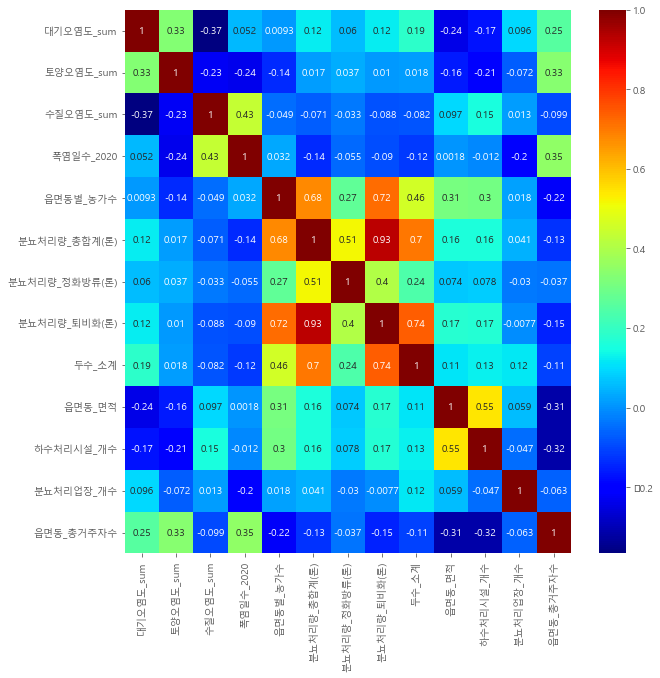

In [163]:
plt.figure(figsize=[10,10])
sns.heatmap(df_cor_시도, annot=True, cmap=plt.cm.jet)
plt.show()

In [164]:
df_cor_시도

,대기오염도_sum,토양오염도_sum,수질오염도_sum,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
대기오염도_sum,1.000000,0.330380,-0.366686,0.051915,0.009296,0.119442,0.059715,0.119482,0.185988,-0.240775,-0.170995,0.096219,0.254211
토양오염도_sum,0.330380,1.000000,-0.225699,-0.235901,-0.139352,0.017462,0.037208,0.010220,0.017605,-0.160966,-0.208134,-0.072366,0.334771
수질오염도_sum,-0.366686,-0.225699,1.000000,0.434959,-0.049293,-0.071035,-0.032607,-0.087648,-0.081858,0.096672,0.153024,0.013485,-0.099239
폭염일수_2020,0.051915,-0.235901,0.434959,1.000000,0.032081,-0.137215,-0.054531,-0.090430,-0.119387,0.001807,-0.012469,-0.197511,0.353615
읍면동별_농가수,0.009296,-0.139352,-0.049293,0.032081,1.000000,0.676694,0.271259,0.717911,0.458606,0.308203,0.303104,0.017874,-0.220378
분뇨처리량_총합계(톤),0.119442,0.017462,-0.071035,-0.137215,0.676694,1.000000,0.514368,0.925265,0.702583,0.161361,0.158490,0.041163,-0.130146
분뇨처리량_정화방류(톤),0.059715,0.037208,-0.032607,-0.054531,0.271259,0.514368,1.000000,0.402942,0.241391,0.073797,0.078140,-0.030440,-0.036985
분뇨처리량_퇴비화(톤),0.119482,0.010220,-0.087648,-0.090430,0.717911,0.925265,0.402942,1.000000,0.743205,0.174718,0.169953,-0.007684,-0.149472
두수_소계,0.185988,0.017605,-0.081858,-0.119387,0.458606,0.702583,0.241391,0.743205,1.000000,0.109652,0.129298,0.118403,-0.106937
읍면동_면적,-0.240775,-0.160966,0.096672,0.001807,0.308203,0.161361,0.073797,0.174718,0.109652,1.000000,0.545779,0.058968,-0.314071


In [179]:
df_cor_시도.iloc[:3,3:]

,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
대기오염도_sum,0.051915,0.009296,0.119442,0.059715,0.119482,0.185988,-0.240775,-0.170995,0.096219,0.254211
토양오염도_sum,-0.235901,-0.139352,0.017462,0.037208,0.010220,0.017605,-0.160966,-0.208134,-0.072366,0.334771
수질오염도_sum,0.434959,-0.049293,-0.071035,-0.032607,-0.087648,-0.081858,0.096672,0.153024,0.013485,-0.099239


In [180]:
abs(df_cor_시도.iloc[:3,3:]).sum(axis=1)

대기오염도_sum    1.308038
토양오염도_sum    1.233985
수질오염도_sum    1.119821
dtype: float64

> 종속변수로 대기오염도 선정

In [182]:
df.columns

Index(['대기오염도_sum', '토양오염도_sum', '수질오염도_sum', '시군별_수질오염도', '시도별_토양오염도',
       '시군별_토양오염도', '시군별_대기오염도', '시도', '시군', '읍면동', '폭염일수_2020', '읍면동별_농가수',
       '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)', '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우',
       '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수',
       '읍면동_총거주자수'],
      dtype='object')

In [186]:
df = df.drop(columns=['토양오염도_sum', '수질오염도_sum','시군별_수질오염도', '시도별_토양오염도','시군별_토양오염도']).rename(columns={'대기오염도_sum':
                                                                                                '시도별_대기오염도'})
df

,시도별_대기오염도,시군별_대기오염도,시도,시군,읍면동,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
0,20.776917,NaN,서울특별시,종로구,청운효자동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0
1,20.776917,NaN,서울특별시,종로구,종로1.2.3.4가동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0
2,20.776917,NaN,서울특별시,종로구,종로5.6가동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0
3,20.776917,NaN,서울특별시,종로구,창신제1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0
4,20.776917,NaN,서울특별시,종로구,창신제2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,15.426917,15.173917,제주특별자치도,서귀포시,송산동,0.0,7.0,5.56736,0.0,5.567360,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0
4119,15.426917,15.173917,제주특별자치도,서귀포시,동홍동,NaN,2.0,0.53280,0.0,0.532800,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0
4120,15.426917,15.173917,제주특별자치도,서귀포시,천지동,0.0,6.0,6.31259,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0
4121,15.426917,15.173917,제주특별자치도,서귀포시,서홍동,NaN,6.0,6.31259,0.0,6.312590,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0


# 2. EDA
- 농가수 대비 두수
- 농가수 대비 처리시설 개수
- 읍면동별_농가수 는 EDA용
- 면적대비 파생변수를 만들어 모델링용 변수 생성

In [324]:
# df_origin.to_excel('파생변수_merged_Basic.xlsx', index=False, encoding='utf-8-sig')

In [328]:
df.columns

Index(['대기오염_파생변수', '시도별_대기오염도', '시군별_대기오염도', '시도', '시군', '읍면동', '폭염일수_2020',
       '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)', '분뇨처리량_퇴비화(톤)', '두수_소계',
       '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리', '읍면동_면적', '하수처리시설_개수',
       '분뇨처리업장_개수', '읍면동_총거주자수'],
      dtype='object')

In [331]:
df[['시도','대기오염_파생변수']].groupby(by='시도').mean().reset_index().sort_values(by='대기오염_파생변수', ascending=False)

,시도,대기오염_파생변수
0,강원도,1.482019
15,충청남도,1.305044
16,충청북도,1.258727
10,울산광역시,1.217670
3,경상북도,1.062626
12,전라남도,1.062168
6,대전광역시,1.032761
13,전라북도,0.967506
11,인천광역시,0.892453
2,경상남도,0.855179


In [334]:
df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)

,시도,두수_소계
16,충청북도,215949.206897
15,충청남도,215395.378531
1,경기도,173829.664207
13,전라북도,152087.217172
12,전라남도,118277.418182
3,경상북도,108515.562701
14,제주특별자치도,106911.400000
0,강원도,69542.601156
2,경상남도,65593.266409
10,울산광역시,16104.727273


In [337]:
df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)

,시도,두수_소계
16,충청북도,215949.206897
15,충청남도,215395.378531
1,경기도,173829.664207
13,전라북도,152087.217172
12,전라남도,118277.418182
3,경상북도,108515.562701
14,제주특별자치도,106911.400000
0,강원도,69542.601156
2,경상남도,65593.266409
10,울산광역시,16104.727273


In [346]:
df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)['시도']

16       충청북도
15       충청남도
1         경기도
13       전라북도
12       전라남도
3        경상북도
14    제주특별자치도
0         강원도
2        경상남도
10      울산광역시
11      인천광역시
4       광주광역시
5       대구광역시
7       부산광역시
6       대전광역시
8       서울특별시
9     세종특별자치시
Name: 시도, dtype: object

In [347]:
df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)['두수_소계']

16    215949.206897
15    215395.378531
1     173829.664207
13    152087.217172
12    118277.418182
3     108515.562701
14    106911.400000
0      69542.601156
2      65593.266409
10     16104.727273
11     14825.862069
4      10131.238095
5       9870.967742
7       8065.750000
6       3562.440000
8         17.166667
9               NaN
Name: 두수_소계, dtype: float64

In [356]:
df[['시도','두수_소계']].groupby(by='시도').mean().fillna(0)

,두수_소계
시도,
강원도,69542.601156
경기도,173829.664207
경상남도,65593.266409
경상북도,108515.562701
광주광역시,10131.238095
대구광역시,9870.967742
대전광역시,3562.440000
부산광역시,8065.750000
서울특별시,17.166667


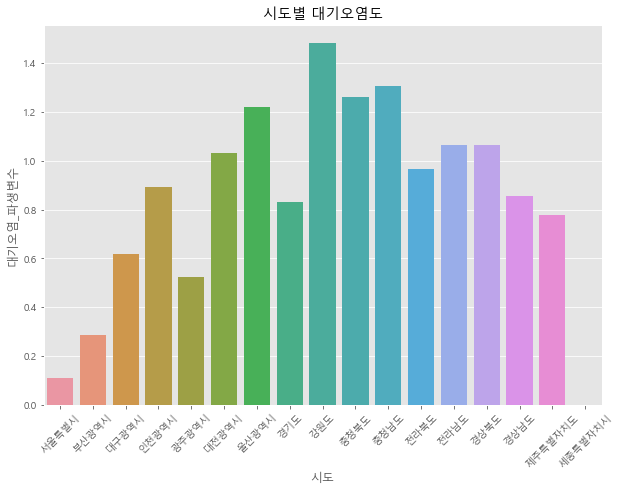

In [359]:
plt.figure(figsize=[10,7])

sns.barplot(x='시도', y='대기오염_파생변수', data=df, ci=False)

plt.title('시도별 대기오염도')
plt.xticks(rotation=45)
plt.show()

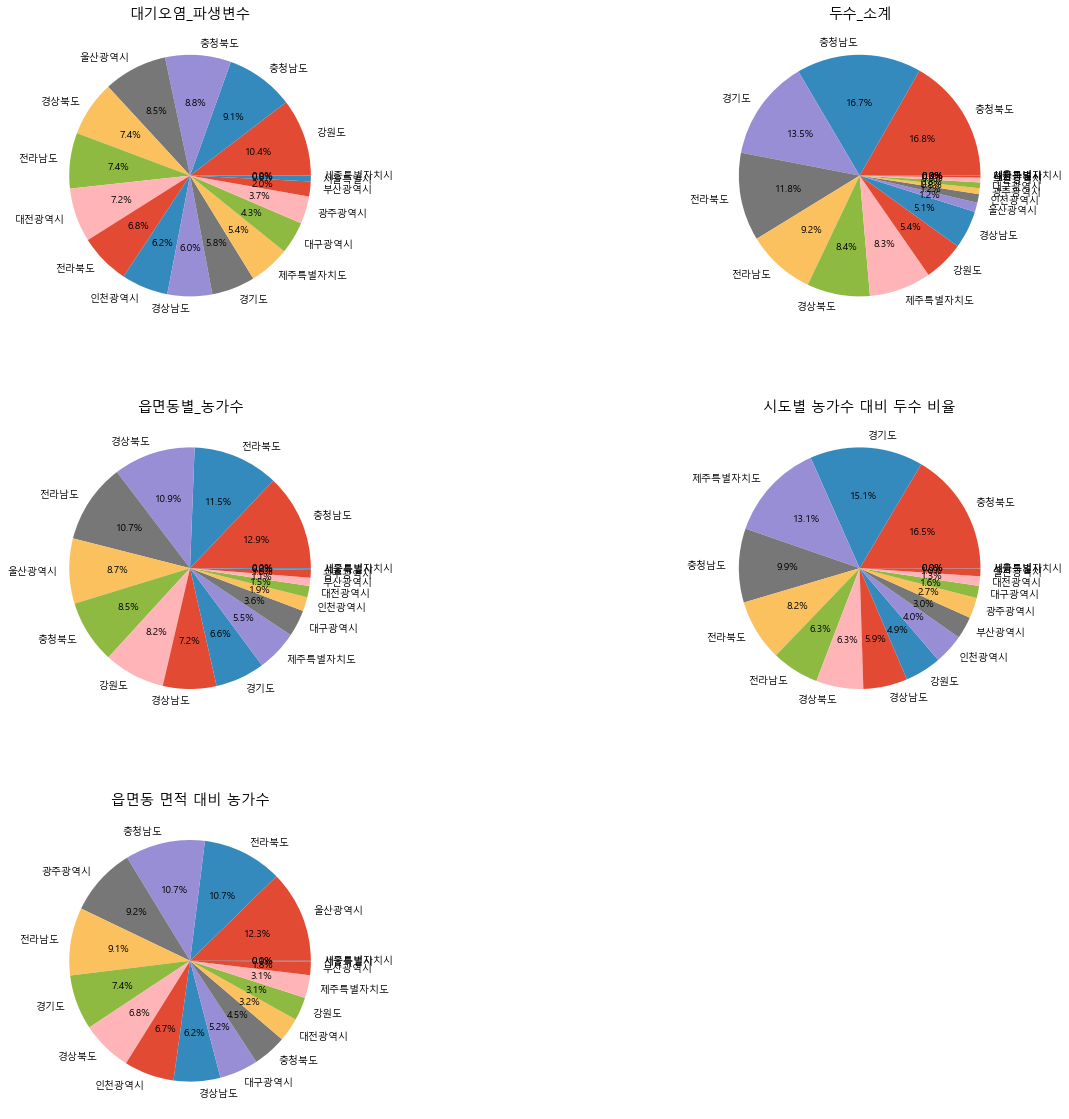

In [373]:
plt.figure(figsize=[20,20])
plt.subplots_adjust(hspace=.3, wspace=.5)

plt.subplot(321)
plt.pie(df[['시도','대기오염_파생변수']].groupby(by='시도').mean().reset_index().sort_values(by='대기오염_파생변수', ascending=False)['대기오염_파생변수'],
       labels=df[['시도','대기오염_파생변수']].groupby(by='시도').mean().reset_index().sort_values(by='대기오염_파생변수', ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('대기오염_파생변수')

plt.subplot(322)
plt.pie(df[['시도','두수_소계']].groupby(by='시도').mean().fillna(0).reset_index().sort_values(by='두수_소계', ascending=False)['두수_소계'],
       labels=df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('두수_소계')

plt.subplot(323)
plt.pie(df[['시도','읍면동별_농가수']].groupby(by='시도').mean().fillna(0).reset_index().sort_values(by='읍면동별_농가수', ascending=False)['읍면동별_농가수'],
       labels=df[['시도','읍면동별_농가수']].groupby(by='시도').mean().reset_index().sort_values(by='읍면동별_농가수', ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('읍면동별_농가수')

plt.subplot(325)
plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('읍면동 면적 대비 농가수')

plt.subplot(324)
plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().fillna(0).sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('시도별 농가수 대비 두수 비율')
plt.show()



plt.show()

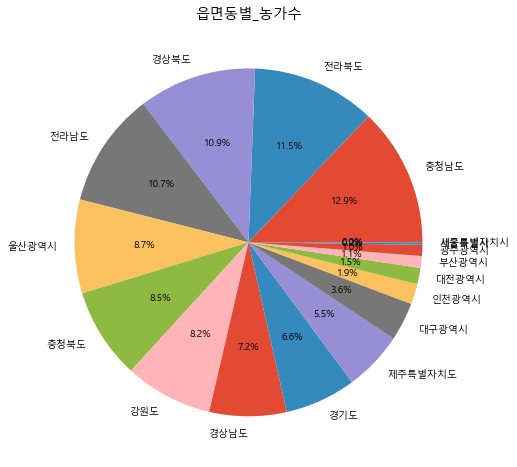

In [362]:
plt.figure(figsize=[8,8])

plt.pie(df[['시도','읍면동별_농가수']].groupby(by='시도').mean().fillna(0).reset_index().sort_values(by='읍면동별_농가수', ascending=False)['읍면동별_농가수'],
       labels=df[['시도','읍면동별_농가수']].groupby(by='시도').mean().reset_index().sort_values(by='읍면동별_농가수', ascending=False)['시도'],
       autopct='%1.1f%%')

plt.title('읍면동별_농가수')
plt.show()

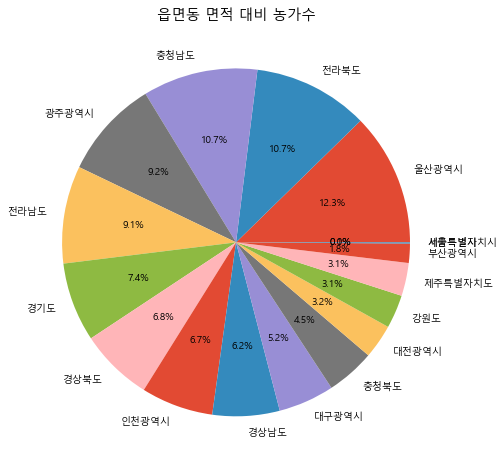

In [363]:
plt.figure(figsize=[8,8])

plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')

plt.title('읍면동 면적 대비 농가수')
plt.show()

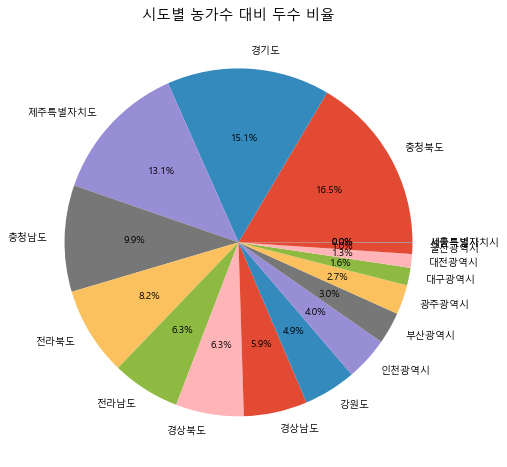

In [365]:
plt.figure(figsize=[8,8])

plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().fillna(0).sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')

plt.title('시도별 농가수 대비 두수 비율')
plt.show()

In [383]:
print(len(df.loc[(df['시도']=='충청남도')|(df['시도']=='충청북도')|(df['시도']=='경기도')])
,df.loc[(df['시도']=='충청남도')|(df['시도']=='충청북도')|(df['시도']=='경기도')].isna().sum())

1056 대기오염_파생변수           0
시도별_대기오염도           0
시군별_대기오염도         355
시도                  0
시군                  0
읍면동                 0
폭염일수_2020        1033
읍면동별_농가수          459
분뇨처리량_총합계(톤)      492
분뇨처리량_정화방류(톤)     492
분뇨처리량_퇴비화(톤)      492
두수_소계             492
두수_한육우            492
두수_젖소             492
두수_말              492
두수_돼지             492
두수_닭·오리           492
읍면동_면적             80
하수처리시설_개수           0
분뇨처리업장_개수         994
읍면동_총거주자수         117
dtype: int64


In [385]:
# df.loc[(df['시도']=='충청남도')|(df['시도']=='충청북도')|(df['시도']=='경기도')].to_excel('Basic_Dataset_충청경기.xlsx', index=False, encoding='utf-8-sig')

In [393]:
df[df['시도']=='충청남도']['분뇨처리업장_개수'].isna().sum()

208